# Import package

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve

sns.set(style = 'whitegrid',context = 'notebook')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 175)

print("Setup complete...")

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

Setup complete...


In [18]:
#######################################################################
### DefineTarget
#######################################################################
def DefineTarget(target_val):
    if(target_val == 'Yes'):
        target_val = 1
    else:
        target_val = 0
    
    return target_val


#######################################################################
### Descriptive Statistics
#######################################################################
def DescriptiveStatistics(df):
    countvar = df.count()
    meanvar = np.round(df.mean(),1)
    minvar = df.min()
    maxvar = df.max()
    stdvar = np.round(df.std(),1)
    statistics_df = pd.concat([meanvar,minvar,maxvar,stdvar,countvar],axis=1)
    statistics_df = pd.DataFrame(statistics_df).reset_index()
    orgname = list(statistics_df.columns.values)
    statistics_df.rename(columns={orgname[0]:'variable',
                                  orgname[1]:'mean',
                                  orgname[2]:'min',
                                  orgname[3]:'max',
                                  orgname[4]:'std',
                                  orgname[5]:'non_missing'},
                                  inplace = True)
    statistics_df['Total'] = df.shape[0]
    statistics_df['miss_per'] = np.round(100*(statistics_df['Total'] - statistics_df['non_missing'])/statistics_df['Total'],1)
    
    return statistics_df


#######################################################################
### Check_Missing_Data
#######################################################################
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data


#######################################################################
### Create dummy varibales
#######################################################################
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e]=objdf_new[e] + "_" + str(i)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname])
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy


#######################################################################
### ModelSelection
#######################################################################
def ModelSelection(X_train, y_train, X_test, y_test):
    
    # Import libraries
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from lightgbm import LGBMClassifier
    from sklearn.svm import SVC, LinearSVC
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from xgboost import XGBClassifier
    from sklearn.neural_network import MLPClassifier
    
    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'
    
    # Initialize the classifier models with their default parameters and add them to the list
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Train model
    # evaluate each model in turn
    from sklearn import model_selection
    from sklearn.model_selection import train_test_split
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    results_df = pd.DataFrame(results)
    print(results_df)
    
    plt.figure(figsize=(15,10))
    sns.boxplot(data=results_df)
    plt.show()
    
    # Make predictions on validation dataset
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(name)
        print('Accuracy score: ',accuracy_score(y_test, predictions))
        print(classification_report(y_test, predictions))
        

#######################################################################
### median_target
#######################################################################
def median_target(var, df):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Target']].groupby(['Target'])[[var]].median().reset_index()
    
    return temp   


######################################################################
### Replacing_NA_Value
#######################################################################
def Replacing_NA_Value(var, df):
    df.loc[(df['Target'] == 0 ) & (df[var].isnull()), var] = median_target(var,df).iloc[0,1]
    df.loc[(df['Target'] == 1 ) & (df[var].isnull()), var] = median_target(var,df).iloc[1,1]
    
    return df[var]

######################################################################
### ModelEvaluation
#######################################################################
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)
    model.fit(X_train, y_train)
    print('-----------------------------------------------------------')
    print('Train set')
    y_train_pred = model.predict(X_train)
    prob_train_pred = model.predict_proba(X_train)
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred[:,1]))
    print(classification_report(y_train, y_train_pred))
    print('-----------------------------------------------------------')
    print('Test set')
    y_test_pred = model.predict(X_test)
    prob_test_pred = model.predict_proba(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred[:,1]))
    print(classification_report(y_test, y_test_pred))
    

    
#######################################################################
### plot_confusion_matrix
#######################################################################
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Import data

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
original_df = df.copy()

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Replace missing values and EDA

In [7]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

### Insulin

In [8]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [9]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = median_target('Insulin').iloc[0,1]
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = median_target('Insulin').iloc[1,1]

### Glucose

In [10]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [11]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose').iloc[0,1]
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose').iloc[1,1]

### SkinThickness

In [12]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [13]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness').iloc[0,1]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness').iloc[1,1]

### BloodPressure 

In [14]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure').iloc[0,1]
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure').iloc[1,1]

### BMI

In [16]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [17]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI').iloc[0,1]
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI').iloc[1,1]

In [19]:
stats_df = DescriptiveStatistics(df)
stats_df

,variable,mean,min,max,std,non_missing,Total,miss_per
0,Pregnancies,3.8,0.000,17.00,3.4,768,768,0.0
1,Glucose,121.7,44.000,199.00,30.5,768,768,0.0
2,BloodPressure,72.4,24.000,122.00,12.1,768,768,0.0
3,SkinThickness,29.1,7.000,99.00,8.9,768,768,0.0
4,Insulin,141.8,14.000,846.00,89.1,768,768,0.0
5,BMI,32.4,18.200,67.10,6.9,768,768,0.0
6,DiabetesPedigreeFunction,0.5,0.078,2.42,0.3,768,768,0.0
7,Age,33.2,21.000,81.00,11.8,768,768,0.0
8,Outcome,0.3,0.000,1.00,0.5,768,768,0.0


## Numerical variables

#### Create a sub-dataframe to store all numeric variables

In [20]:
# Create a sub-dataframe to store all numeric variables in the whole data frame
datatypes= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.drop(['Outcome'],axis=1).select_dtypes(include=datatypes)
target = df.Outcome

numpredictor = numdf.columns
print(numpredictor)
numdf.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


#### Scaling dataset

In [21]:
from sklearn.preprocessing import StandardScaler
numdf_norm = pd.DataFrame(StandardScaler().fit_transform(numdf))
numdf_norm.columns = numdf.columns
numdf_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


In [22]:
numdf_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,1.604619e-16,-3.685926e-16,-3.928426e-17,-8.601337e-18,1.054567e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551447e+00,-3.999727e+00,-2.486187e+00,-1.434747e+00,-2.070186e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.202356e-01,-6.934382e-01,-4.603073e-01,-4.408430e-01,-7.176590e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.536274e-01,-3.218035e-02,-1.226607e-01,-4.408430e-01,-5.593870e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.100618e-01,6.290775e-01,3.275348e-01,3.116039e-01,6.057816e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539814e+00,4.100681e+00,7.868309e+00,7.909072e+00,5.041489e+00,5.883565e+00,4.063716e+00


## Combine all predictors (numeric ones and dummy variables generated above)

In [23]:
X = numdf_norm
print (X.shape)
Y = df['Outcome']
print (Y.shape)

(768, 8)
(768,)


In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496


## Spliting data into training and test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [27]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
y_train_original = y_train.copy()
X_test_original = X_test.copy()
y_test_original = y_test.copy()

# Train and perform cross validation

In [28]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
print(model.summary())
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

model = create_model()
print(model.summary())

W1111 00:15:48.904927  6164 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 491 samples, validate on 123 samples
Epoch 1/20
 - 0s - loss: 0.3018 - accuracy: 0.8635 - val_loss: 0.4880 - val_accuracy: 0.8130
Epoch 2/20
 - 0s - loss: 0.2943 - accuracy: 0.8635 - val_loss: 0.5076 - val_accuracy: 0.8130
Epoch 3/20
 - 0s - loss: 0.2916 - accuracy: 0.8635 - val_loss: 0.5198 - val_accuracy: 0.8293
Epoch 4/20
 - 0s - loss: 0.2914 - accuracy: 0.8615 - val_loss: 0.5090 - val_accuracy: 0.8211
Epoch 5/20
 - 0s - loss: 0.2831 - accuracy: 0.8717 - val_loss: 0.5079 - val_accuracy: 0.8130
Epoch 6/20
 - 0s - loss: 0.2829 - accuracy: 0.8676 - val_loss: 0.5072 - val_accuracy: 0.8211
Epoch 7/20
 - 0s - loss: 0.2810 - accuracy: 0.8737 - val_loss: 0.5197 - val_accuracy: 0.8374
Epoch 8/20
 - 0s - loss: 0.2778 - accuracy: 0.8737 - val_loss: 0.5227 - val_accuracy: 0.8211
Epoch 9/20
 - 0s - loss: 0.2799 - accuracy: 0.8656 - val_loss: 0.5387 - val_accuracy: 0.8130
Epoch 10/20
 - 0s - loss: 0.2762 - accuracy: 0.8717 - val_loss: 0.5461 - val_accuracy: 0.8211
Epoch 11/20
 - 0s - los

# Prediction

In [34]:
y_train_pred = model.predict_classes(X_train, batch_size=200, verbose=0)
prob_train_pred = model.predict(X_train, batch_size=200, verbose=0)

y_test_pred = model.predict_classes(X_test, batch_size=200, verbose=0)
prob_test_pred = model.predict(X_test, batch_size=200, verbose=0)

In [35]:
prob_test_pred[0:5]

array([[0.98948544],
       [0.05302179],
       [0.02509159],
       [0.8083321 ],
       [0.02243352]], dtype=float32)

In [36]:
y_train_pred[0:5]

array([[1],
       [0],
       [1],
       [0],
       [1]])

# Model Evaluation

### Accuracy

In [37]:
accuracy_score(y_train, y_train_pred)

0.8599348534201955

In [38]:
accuracy_score(y_test, y_test_pred)

0.8441558441558441

### Confusion matrix

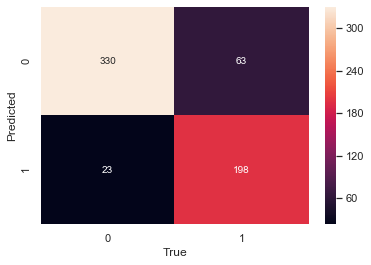

In [39]:
cm_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

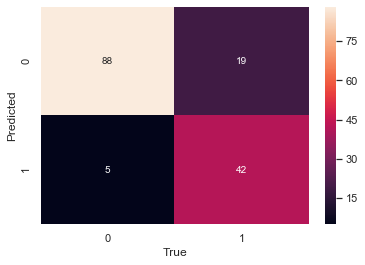

In [40]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

### Classification Report

In [41]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       393
           1       0.76      0.90      0.82       221

    accuracy                           0.86       614
   macro avg       0.85      0.87      0.85       614
weighted avg       0.87      0.86      0.86       614



In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       107
           1       0.69      0.89      0.78        47

    accuracy                           0.84       154
   macro avg       0.82      0.86      0.83       154
weighted avg       0.87      0.84      0.85       154



### ROC AUC Score

In [43]:
roc_auc_score(y_train, prob_train_pred)

0.9327887349890044

In [44]:
roc_auc_score(y_test, prob_test_pred)

0.9254324915490157

### ROC Curve

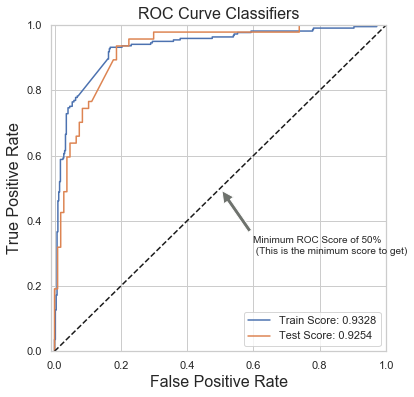

In [45]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()


### Precision-Recall curve

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.84')

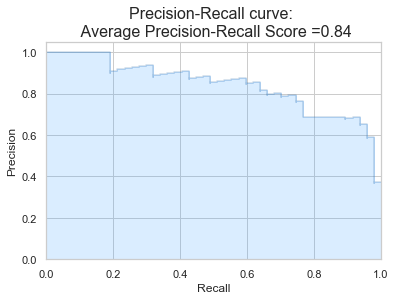

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

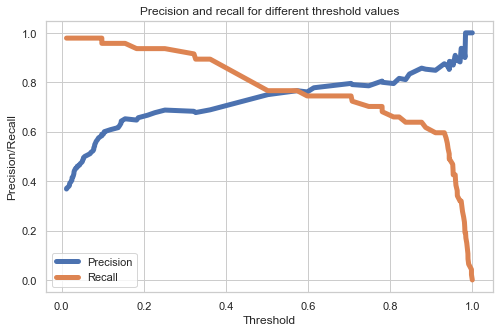

In [47]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.89')

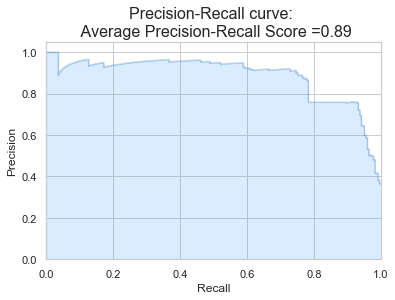

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

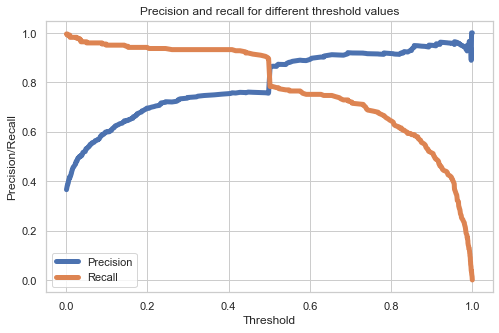

In [49]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

### Summary

In [50]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred))
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred))
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    

In [51]:
ModelEvaluation(model,X_train,y_train,X_test,y_test,'RF')

Model Evaluation of RF
-----------------------------------------------------------
Train set
Accuracy:  0.8599348534201955
ROC AUC Score:  0.9327887349890044
Confusion matrix
True         0    1
Predicted          
0          330   63
1           23  198
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       393
           1       0.76      0.90      0.82       221

    accuracy                           0.86       614
   macro avg       0.85      0.87      0.85       614
weighted avg       0.87      0.86      0.86       614

-----------------------------------------------------------
Test set
Accuracy:  0.8441558441558441
ROC AUC Score:  0.9254324915490157
Confusion matrix
True        0   1
Predicted        
0          88  19
1           5  42
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       107
           1       0.69      0.89      0.78        47

    accuracy                   

# Tuning hyper-parameters

In [52]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
409/409 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.6675
Epoch 2/10
409/409 [==============================] - 0s 248us/step - loss: 0.4694 - accuracy: 0.7897
Epoch 3/10
409/409 [==============================] - 0s 243us/step - loss: 0.4524 - accuracy: 0.7800
Epoch 4/10
409/409 [==============================] - 0s 243us/step - loss: 0.4328 - accuracy: 0.7946
Epoch 5/10
409/409 [==============================] - 0s 203us/step - loss: 0.4121 - accuracy: 0.8068
Epoch 6/10
409/409 [==============================] - 0s 244us/step - loss: 0.3845 - accuracy: 0.8215
Epoch 7/10
409/409 [==============================] - 0s 245us/step - loss: 0.3733 - accuracy: 0.8435
Epoch 8/10
409/409 [==============================] - 0s 279us/step - loss: 0.3608 - accuracy: 0.8606
Epoch 9/10
409/409 [==============================] - 0s 198us/step - loss: 0.3480 - accuracy: 0.8655
Epoch 10/10
205/205 [==============================] - 0s 623us/step
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


Epoch 1/10
409/409 [==============================] - 1s 2ms/step - loss: 0.5872 - accuracy: 0.7115
Epoch 2/10
409/409 [==============================] - 0s 244us/step - loss: 0.4843 - accuracy: 0.7677
Epoch 3/10
409/409 [==============================] - 0s 212us/step - loss: 0.4689 - accuracy: 0.7653
Epoch 4/10
409/409 [==============================] - 0s 246us/step - loss: 0.4458 - accuracy: 0.7824
Epoch 5/10
409/409 [==============================] - 0s 216us/step - loss: 0.4335 - accuracy: 0.8093
Epoch 6/10
409/409 [==============================] - 0s 213us/step - loss: 0.4264 - accuracy: 0.8093
Epoch 7/10
409/409 [==============================] - 0s 286us/step - loss: 0.4042 - accuracy: 0.8362
Epoch 8/10
409/409 [==============================] - 0s 231us/step - loss: 0.4053 - accuracy: 0.8362
Epoch 9/10
409/409 [==============================] - 0s 318us/step - loss: 0.3849 - accuracy: 0.8557
Epoch 10/10
205/205 [==============================] - 0s 782us/step
[CV] ..........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


Epoch 1/10
410/410 [==============================] - 1s 2ms/step - loss: 0.6054 - accuracy: 0.6098
Epoch 2/10
410/410 [==============================] - 0s 300us/step - loss: 0.4704 - accuracy: 0.7049
Epoch 3/10
410/410 [==============================] - 0s 191us/step - loss: 0.4134 - accuracy: 0.8390
Epoch 4/10
410/410 [==============================] - 0s 249us/step - loss: 0.3798 - accuracy: 0.8585
Epoch 5/10
410/410 [==============================] - 0s 242us/step - loss: 0.3625 - accuracy: 0.8659
Epoch 6/10
410/410 [==============================] - 0s 214us/step - loss: 0.3484 - accuracy: 0.8683
Epoch 7/10
410/410 [==============================] - 0s 210us/step - loss: 0.3359 - accuracy: 0.8683
Epoch 8/10
410/410 [==============================] - 0s 240us/step - loss: 0.3297 - accuracy: 0.8707
Epoch 9/10
410/410 [==============================] - 0s 244us/step - loss: 0.3244 - accuracy: 0.8732
Epoch 10/10
204/204 [==============================] - 0s 664us/step
[CV] ..........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s remaining:    0.0s


Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.6944
Epoch 2/50
409/409 [==============================] - 0s 229us/step - loss: 0.4487 - accuracy: 0.7873
Epoch 3/50
409/409 [==============================] - 0s 244us/step - loss: 0.4156 - accuracy: 0.8289
Epoch 4/50
409/409 [==============================] - 0s 217us/step - loss: 0.3844 - accuracy: 0.8411
Epoch 5/50
409/409 [==============================] - 0s 215us/step - loss: 0.3719 - accuracy: 0.8411
Epoch 6/50
409/409 [==============================] - 0s 244us/step - loss: 0.3524 - accuracy: 0.8533
Epoch 7/50
409/409 [==============================] - 0s 216us/step - loss: 0.3483 - accuracy: 0.8582
Epoch 8/50
409/409 [==============================] - 0s 237us/step - loss: 0.3451 - accuracy: 0.8582
Epoch 9/50
409/409 [==============================] - 0s 244us/step - loss: 0.3418 - accuracy: 0.8655
Epoch 10/50
409/409 [==============================] - 0s 239us/step - loss: 0.3353 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.9s remaining:    0.0s


Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.5980 - accuracy: 0.6479
Epoch 2/50
409/409 [==============================] - 0s 240us/step - loss: 0.4955 - accuracy: 0.6528
Epoch 3/50
409/409 [==============================] - 0s 218us/step - loss: 0.4669 - accuracy: 0.7824
Epoch 4/50
409/409 [==============================] - 0s 219us/step - loss: 0.4513 - accuracy: 0.7971
Epoch 5/50
409/409 [==============================] - 0s 239us/step - loss: 0.4391 - accuracy: 0.8191
Epoch 6/50
409/409 [==============================] - 0s 245us/step - loss: 0.4325 - accuracy: 0.8142
Epoch 7/50
409/409 [==============================] - 0s 232us/step - loss: 0.4195 - accuracy: 0.8264
Epoch 8/50
409/409 [==============================] - 0s 252us/step - loss: 0.4133 - accuracy: 0.8337
Epoch 9/50
409/409 [==============================] - 0s 244us/step - loss: 0.4101 - accuracy: 0.8386
Epoch 10/50
409/409 [==============================] - 0s 258us/step - loss: 0.4032 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.3s remaining:    0.0s


Epoch 1/50
410/410 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7561
Epoch 2/50
410/410 [==============================] - 0s 160us/step - loss: 0.4101 - accuracy: 0.8073
Epoch 3/50
410/410 [==============================] - 0s 233us/step - loss: 0.3694 - accuracy: 0.8317
Epoch 4/50
410/410 [==============================] - 0s 244us/step - loss: 0.3355 - accuracy: 0.8463
Epoch 5/50
410/410 [==============================] - 0s 245us/step - loss: 0.3268 - accuracy: 0.8537
Epoch 6/50
410/410 [==============================] - 0s 245us/step - loss: 0.3192 - accuracy: 0.8585
Epoch 7/50
410/410 [==============================] - 0s 244us/step - loss: 0.3080 - accuracy: 0.8683
Epoch 8/50
410/410 [==============================] - 0s 241us/step - loss: 0.2981 - accuracy: 0.8732
Epoch 9/50
410/410 [==============================] - 0s 214us/step - loss: 0.2984 - accuracy: 0.8780
Epoch 10/50
410/410 [==============================] - 0s 212us/step - loss: 0.2905 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.8s remaining:    0.0s


Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.5883 - accuracy: 0.6846
Epoch 2/100
409/409 [==============================] - 0s 263us/step - loss: 0.4561 - accuracy: 0.7922
Epoch 3/100
409/409 [==============================] - 0s 247us/step - loss: 0.4310 - accuracy: 0.8142
Epoch 4/100
409/409 [==============================] - 0s 245us/step - loss: 0.4013 - accuracy: 0.8337
Epoch 5/100
409/409 [==============================] - 0s 242us/step - loss: 0.3799 - accuracy: 0.8435
Epoch 6/100
409/409 [==============================] - 0s 245us/step - loss: 0.3640 - accuracy: 0.8655
Epoch 7/100
409/409 [==============================] - 0s 244us/step - loss: 0.3454 - accuracy: 0.8704
Epoch 8/100
409/409 [==============================] - 0s 251us/step - loss: 0.3466 - accuracy: 0.8704
Epoch 9/100
409/409 [==============================] - 0s 238us/step - loss: 0.3337 - accuracy: 0.8778
Epoch 10/100
409/409 [==============================] - 0s 218us/step - los

409/409 [==============================] - 0s 226us/step - loss: 0.2254 - accuracy: 0.9071
Epoch 80/100
409/409 [==============================] - 0s 378us/step - loss: 0.2210 - accuracy: 0.9120
Epoch 81/100
409/409 [==============================] - 0s 230us/step - loss: 0.2187 - accuracy: 0.9095
Epoch 82/100
409/409 [==============================] - 0s 100us/step - loss: 0.2198 - accuracy: 0.9046
Epoch 83/100
409/409 [==============================] - 0s 162us/step - loss: 0.2175 - accuracy: 0.9120
Epoch 84/100
409/409 [==============================] - 0s 113us/step - loss: 0.2172 - accuracy: 0.9071
Epoch 85/100
409/409 [==============================] - 0s 194us/step - loss: 0.2355 - accuracy: 0.8998
Epoch 86/100
409/409 [==============================] - 0s 204us/step - loss: 0.2229 - accuracy: 0.9095
Epoch 87/100
409/409 [==============================] - 0s 219us/step - loss: 0.2119 - accuracy: 0.9095
Epoch 88/100
409/409 [==============================] - 0s 234us/step - loss:

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   44.1s remaining:    0.0s


Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6236 - accuracy: 0.6430
Epoch 2/100
409/409 [==============================] - 0s 314us/step - loss: 0.4906 - accuracy: 0.7604
Epoch 3/100
409/409 [==============================] - 0s 286us/step - loss: 0.4610 - accuracy: 0.7775
Epoch 4/100
409/409 [==============================] - 0s 246us/step - loss: 0.4490 - accuracy: 0.7824
Epoch 5/100
409/409 [==============================] - 0s 379us/step - loss: 0.4347 - accuracy: 0.7971
Epoch 6/100
409/409 [==============================] - 0s 219us/step - loss: 0.4171 - accuracy: 0.8191
Epoch 7/100
409/409 [==============================] - 0s 305us/step - loss: 0.3966 - accuracy: 0.8362
Epoch 8/100
409/409 [==============================] - 0s 264us/step - loss: 0.3847 - accuracy: 0.8435
Epoch 9/100
409/409 [==============================] - 0s 240us/step - loss: 0.3712 - accuracy: 0.8557
Epoch 10/100
409/409 [==============================] - 0s 176us/step - los

409/409 [==============================] - 0s 222us/step - loss: 0.2122 - accuracy: 0.9144
Epoch 79/100
409/409 [==============================] - 0s 223us/step - loss: 0.2009 - accuracy: 0.9291
Epoch 80/100
409/409 [==============================] - 0s 242us/step - loss: 0.1902 - accuracy: 0.9364
Epoch 81/100
409/409 [==============================] - 0s 209us/step - loss: 0.1932 - accuracy: 0.9340
Epoch 82/100
409/409 [==============================] - 0s 234us/step - loss: 0.1922 - accuracy: 0.9340
Epoch 83/100
409/409 [==============================] - 0s 206us/step - loss: 0.1931 - accuracy: 0.9291
Epoch 84/100
409/409 [==============================] - 0s 217us/step - loss: 0.2038 - accuracy: 0.9218
Epoch 85/100
409/409 [==============================] - 0s 232us/step - loss: 0.1939 - accuracy: 0.9315
Epoch 86/100
409/409 [==============================] - 0s 215us/step - loss: 0.1924 - accuracy: 0.9315
Epoch 87/100
409/409 [==============================] - 0s 217us/step - loss:

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   56.9s remaining:    0.0s


Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.5609 - accuracy: 0.7463
Epoch 2/100
410/410 [==============================] - 0s 278us/step - loss: 0.3975 - accuracy: 0.8122
Epoch 3/100
410/410 [==============================] - 0s 243us/step - loss: 0.3522 - accuracy: 0.8488
Epoch 4/100
410/410 [==============================] - 0s 242us/step - loss: 0.3340 - accuracy: 0.8659
Epoch 5/100
410/410 [==============================] - 0s 248us/step - loss: 0.3244 - accuracy: 0.8634
Epoch 6/100
410/410 [==============================] - 0s 244us/step - loss: 0.3033 - accuracy: 0.8732
Epoch 7/100
410/410 [==============================] - 0s 241us/step - loss: 0.2986 - accuracy: 0.8902
Epoch 8/100
410/410 [==============================] - 0s 279us/step - loss: 0.2951 - accuracy: 0.8829
Epoch 9/100
410/410 [==============================] - 0s 241us/step - loss: 0.3011 - accuracy: 0.8902
Epoch 10/100
410/410 [==============================] - 0s 247us/step - los

410/410 [==============================] - 0s 234us/step - loss: 0.1276 - accuracy: 0.9561
Epoch 80/100
410/410 [==============================] - 0s 215us/step - loss: 0.1291 - accuracy: 0.9561
Epoch 81/100
410/410 [==============================] - 0s 219us/step - loss: 0.1427 - accuracy: 0.9463
Epoch 82/100
410/410 [==============================] - 0s 211us/step - loss: 0.1409 - accuracy: 0.9463
Epoch 83/100
410/410 [==============================] - 0s 220us/step - loss: 0.1254 - accuracy: 0.9537
Epoch 84/100
410/410 [==============================] - 0s 232us/step - loss: 0.1153 - accuracy: 0.9610
Epoch 85/100
410/410 [==============================] - 0s 246us/step - loss: 0.1159 - accuracy: 0.9610
Epoch 86/100
410/410 [==============================] - 0s 237us/step - loss: 0.1083 - accuracy: 0.9634
Epoch 87/100
410/410 [==============================] - 0s 215us/step - loss: 0.1135 - accuracy: 0.9683
Epoch 88/100
410/410 [==============================] - 0s 231us/step - loss:

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


Epoch 1/10
409/409 [==============================] - 1s 2ms/step - loss: 0.6368 - accuracy: 0.6553
Epoch 2/10
409/409 [==============================] - 0s 125us/step - loss: 0.4869 - accuracy: 0.7628
Epoch 3/10
409/409 [==============================] - 0s 163us/step - loss: 0.4426 - accuracy: 0.8020
Epoch 4/10
409/409 [==============================] - 0s 125us/step - loss: 0.4207 - accuracy: 0.7995
Epoch 5/10
409/409 [==============================] - 0s 122us/step - loss: 0.4107 - accuracy: 0.8166
Epoch 6/10
409/409 [==============================] - 0s 173us/step - loss: 0.3929 - accuracy: 0.8215
Epoch 7/10
409/409 [==============================] - 0s 147us/step - loss: 0.3779 - accuracy: 0.8435
Epoch 8/10
409/409 [==============================] - 0s 124us/step - loss: 0.3632 - accuracy: 0.8509
Epoch 9/10
409/409 [==============================] - 0s 121us/step - loss: 0.3547 - accuracy: 0.8557
Epoch 10/10
205/205 [==============================] - 0s 1ms/step
[CV] ............

409/409 [==============================] - 0s 120us/step - loss: 0.3222 - accuracy: 0.8729
Epoch 45/50
409/409 [==============================] - 0s 126us/step - loss: 0.3213 - accuracy: 0.8802
Epoch 46/50
409/409 [==============================] - 0s 116us/step - loss: 0.3194 - accuracy: 0.8826
Epoch 47/50
409/409 [==============================] - 0s 125us/step - loss: 0.3195 - accuracy: 0.8875
Epoch 48/50
409/409 [==============================] - 0s 120us/step - loss: 0.3170 - accuracy: 0.8778
Epoch 49/50
409/409 [==============================] - 0s 177us/step - loss: 0.3246 - accuracy: 0.8826
Epoch 50/50
205/205 [==============================] - 0s 1ms/step
[CV] ............ batch_size=20, epochs=50, score=0.829, total=   6.6s
[CV] batch_size=20, epochs=50 ........................................
Epoch 1/50
409/409 [==============================] - 1s 2ms/step - loss: 0.6556 - accuracy: 0.6846
Epoch 2/50
409/409 [==============================] - 0s 142us/step - loss: 0.5080 - 

410/410 [==============================] - 0s 142us/step - loss: 0.2460 - accuracy: 0.9146
Epoch 21/50
410/410 [==============================] - 0s 118us/step - loss: 0.2532 - accuracy: 0.9122
Epoch 22/50
410/410 [==============================] - 0s 138us/step - loss: 0.2522 - accuracy: 0.9122
Epoch 23/50
410/410 [==============================] - 0s 128us/step - loss: 0.2355 - accuracy: 0.9220
Epoch 24/50
410/410 [==============================] - 0s 140us/step - loss: 0.2364 - accuracy: 0.9146
Epoch 25/50
410/410 [==============================] - 0s 106us/step - loss: 0.2295 - accuracy: 0.9220
Epoch 26/50
410/410 [==============================] - 0s 162us/step - loss: 0.2275 - accuracy: 0.9293
Epoch 27/50
410/410 [==============================] - 0s 89us/step - loss: 0.2280 - accuracy: 0.9293
Epoch 28/50
410/410 [==============================] - 0s 140us/step - loss: 0.2287 - accuracy: 0.9244
Epoch 29/50
410/410 [==============================] - 0s 120us/step - loss: 0.2286 - 

409/409 [==============================] - 0s 121us/step - loss: 0.3098 - accuracy: 0.8778
Epoch 48/100
409/409 [==============================] - 0s 125us/step - loss: 0.3068 - accuracy: 0.8704
Epoch 49/100
409/409 [==============================] - 0s 125us/step - loss: 0.3042 - accuracy: 0.8704
Epoch 50/100
409/409 [==============================] - 0s 122us/step - loss: 0.3040 - accuracy: 0.8729
Epoch 51/100
409/409 [==============================] - 0s 143us/step - loss: 0.3080 - accuracy: 0.8680
Epoch 52/100
409/409 [==============================] - 0s 119us/step - loss: 0.3026 - accuracy: 0.8778
Epoch 53/100
409/409 [==============================] - 0s 125us/step - loss: 0.3025 - accuracy: 0.8729
Epoch 54/100
409/409 [==============================] - 0s 127us/step - loss: 0.3019 - accuracy: 0.8753
Epoch 55/100
409/409 [==============================] - 0s 144us/step - loss: 0.3032 - accuracy: 0.8729
Epoch 56/100
409/409 [==============================] - 0s 156us/step - loss:

409/409 [==============================] - 0s 143us/step - loss: 0.3389 - accuracy: 0.8778
Epoch 25/100
409/409 [==============================] - 0s 122us/step - loss: 0.3516 - accuracy: 0.8680
Epoch 26/100
409/409 [==============================] - 0s 166us/step - loss: 0.3519 - accuracy: 0.8729
Epoch 27/100
409/409 [==============================] - 0s 107us/step - loss: 0.3424 - accuracy: 0.8557
Epoch 28/100
409/409 [==============================] - 0s 129us/step - loss: 0.3368 - accuracy: 0.8729
Epoch 29/100
409/409 [==============================] - 0s 69us/step - loss: 0.3311 - accuracy: 0.8729
Epoch 30/100
409/409 [==============================] - 0s 164us/step - loss: 0.3355 - accuracy: 0.8729
Epoch 31/100
409/409 [==============================] - 0s 122us/step - loss: 0.3379 - accuracy: 0.8680
Epoch 32/100
409/409 [==============================] - 0s 163us/step - loss: 0.3368 - accuracy: 0.8778
Epoch 33/100
409/409 [==============================] - 0s 111us/step - loss: 

410/410 [==============================] - 1s 2ms/step - loss: 0.6540 - accuracy: 0.6463
Epoch 2/100
410/410 [==============================] - 0s 116us/step - loss: 0.4783 - accuracy: 0.8073
Epoch 3/100
410/410 [==============================] - 0s 125us/step - loss: 0.4105 - accuracy: 0.8195
Epoch 4/100
410/410 [==============================] - 0s 165us/step - loss: 0.3893 - accuracy: 0.8244
Epoch 5/100
410/410 [==============================] - 0s 147us/step - loss: 0.3572 - accuracy: 0.8585
Epoch 6/100
410/410 [==============================] - 0s 120us/step - loss: 0.3409 - accuracy: 0.8707
Epoch 7/100
410/410 [==============================] - 0s 157us/step - loss: 0.3270 - accuracy: 0.8707
Epoch 8/100
410/410 [==============================] - 0s 161us/step - loss: 0.3130 - accuracy: 0.8756
Epoch 9/100
410/410 [==============================] - 0s 148us/step - loss: 0.3089 - accuracy: 0.8683
Epoch 10/100
410/410 [==============================] - 0s 151us/step - loss: 0.3002 - 

410/410 [==============================] - 0s 123us/step - loss: 0.1581 - accuracy: 0.9463
Epoch 81/100
410/410 [==============================] - 0s 160us/step - loss: 0.1409 - accuracy: 0.9561
Epoch 82/100
410/410 [==============================] - 0s 119us/step - loss: 0.1386 - accuracy: 0.9561
Epoch 83/100
410/410 [==============================] - 0s 137us/step - loss: 0.1678 - accuracy: 0.9439
Epoch 84/100
410/410 [==============================] - 0s 156us/step - loss: 0.1469 - accuracy: 0.9585
Epoch 85/100
410/410 [==============================] - 0s 151us/step - loss: 0.1459 - accuracy: 0.9610
Epoch 86/100
410/410 [==============================] - 0s 110us/step - loss: 0.1437 - accuracy: 0.9512
Epoch 87/100
410/410 [==============================] - 0s 127us/step - loss: 0.1386 - accuracy: 0.9585
Epoch 88/100
410/410 [==============================] - 0s 122us/step - loss: 0.1415 - accuracy: 0.9610
Epoch 89/100
410/410 [==============================] - 0s 124us/step - loss:

409/409 [==============================] - 0s 126us/step - loss: 0.3091 - accuracy: 0.8826
Epoch 23/50
409/409 [==============================] - 0s 80us/step - loss: 0.3084 - accuracy: 0.8875
Epoch 24/50
409/409 [==============================] - 0s 70us/step - loss: 0.3081 - accuracy: 0.8802
Epoch 25/50
409/409 [==============================] - 0s 95us/step - loss: 0.3041 - accuracy: 0.8851
Epoch 26/50
409/409 [==============================] - 0s 76us/step - loss: 0.3014 - accuracy: 0.8900
Epoch 27/50
409/409 [==============================] - 0s 82us/step - loss: 0.3034 - accuracy: 0.8851
Epoch 28/50
409/409 [==============================] - ETA: 0s - loss: 0.3343 - accuracy: 0.85 - 0s 81us/step - loss: 0.3041 - accuracy: 0.8900
Epoch 29/50
409/409 [==============================] - 0s 81us/step - loss: 0.3029 - accuracy: 0.8949
Epoch 30/50
409/409 [==============================] - 0s 76us/step - loss: 0.2956 - accuracy: 0.8875
Epoch 31/50
409/409 [==============================

205/205 [==============================] - 0s 2ms/step
[CV] ............ batch_size=40, epochs=50, score=0.863, total=   6.5s
[CV] batch_size=40, epochs=50 ........................................
Epoch 1/50
410/410 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.6829
Epoch 2/50
410/410 [==============================] - 0s 82us/step - loss: 0.5341 - accuracy: 0.7585
Epoch 3/50
410/410 [==============================] - 0s 75us/step - loss: 0.4537 - accuracy: 0.7805
Epoch 4/50
410/410 [==============================] - 0s 108us/step - loss: 0.4155 - accuracy: 0.8000
Epoch 5/50
410/410 [==============================] - 0s 55us/step - loss: 0.3943 - accuracy: 0.8171
Epoch 6/50
410/410 [==============================] - 0s 94us/step - loss: 0.3740 - accuracy: 0.8317
Epoch 7/50
410/410 [==============================] - 0s 89us/step - loss: 0.3596 - accuracy: 0.8439
Epoch 8/50
410/410 [==============================] - 0s 76us/step - loss: 0.3452 - accuracy: 0.

409/409 [==============================] - 0s 81us/step - loss: 0.3496 - accuracy: 0.8582
Epoch 27/100
409/409 [==============================] - 0s 99us/step - loss: 0.3434 - accuracy: 0.8778
Epoch 28/100
409/409 [==============================] - 0s 82us/step - loss: 0.3406 - accuracy: 0.8704
Epoch 29/100
409/409 [==============================] - 0s 76us/step - loss: 0.3416 - accuracy: 0.8704
Epoch 30/100
409/409 [==============================] - 0s 86us/step - loss: 0.3378 - accuracy: 0.8753
Epoch 31/100
409/409 [==============================] - 0s 75us/step - loss: 0.3378 - accuracy: 0.8729
Epoch 32/100
409/409 [==============================] - 0s 81us/step - loss: 0.3361 - accuracy: 0.8680
Epoch 33/100
409/409 [==============================] - 0s 64us/step - loss: 0.3393 - accuracy: 0.8704
Epoch 34/100
409/409 [==============================] - 0s 53us/step - loss: 0.3352 - accuracy: 0.8680
Epoch 35/100
409/409 [==============================] - 0s 115us/step - loss: 0.3333 -

409/409 [==============================] - 0s 101us/step - loss: 0.5603 - accuracy: 0.7506
Epoch 4/100
409/409 [==============================] - 0s 101us/step - loss: 0.5012 - accuracy: 0.7555
Epoch 5/100
409/409 [==============================] - 0s 102us/step - loss: 0.4694 - accuracy: 0.7726
Epoch 6/100
409/409 [==============================] - 0s 88us/step - loss: 0.4605 - accuracy: 0.7800
Epoch 7/100
409/409 [==============================] - 0s 118us/step - loss: 0.4543 - accuracy: 0.7800
Epoch 8/100
409/409 [==============================] - 0s 95us/step - loss: 0.4475 - accuracy: 0.7922
Epoch 9/100
409/409 [==============================] - 0s 79us/step - loss: 0.4396 - accuracy: 0.7971
Epoch 10/100
409/409 [==============================] - 0s 98us/step - loss: 0.4349 - accuracy: 0.8093
Epoch 11/100
409/409 [==============================] - 0s 85us/step - loss: 0.4271 - accuracy: 0.8191
Epoch 12/100
409/409 [==============================] - 0s 85us/step - loss: 0.4194 - ac

409/409 [==============================] - 0s 76us/step - loss: 0.2631 - accuracy: 0.8924
Epoch 83/100
409/409 [==============================] - 0s 85us/step - loss: 0.2610 - accuracy: 0.8875
Epoch 84/100
409/409 [==============================] - 0s 65us/step - loss: 0.2619 - accuracy: 0.8851
Epoch 85/100
409/409 [==============================] - 0s 82us/step - loss: 0.2677 - accuracy: 0.8900
Epoch 86/100
409/409 [==============================] - 0s 88us/step - loss: 0.2670 - accuracy: 0.8900
Epoch 87/100
409/409 [==============================] - 0s 87us/step - loss: 0.2629 - accuracy: 0.8875
Epoch 88/100
409/409 [==============================] - 0s 74us/step - loss: 0.2663 - accuracy: 0.8826
Epoch 89/100
409/409 [==============================] - 0s 105us/step - loss: 0.2622 - accuracy: 0.8826
Epoch 90/100
409/409 [==============================] - 0s 83us/step - loss: 0.2627 - accuracy: 0.8802
Epoch 91/100
409/409 [==============================] - 0s 126us/step - loss: 0.2575 

410/410 [==============================] - 0s 109us/step - loss: 0.1968 - accuracy: 0.9293
Epoch 60/100
410/410 [==============================] - 0s 78us/step - loss: 0.1948 - accuracy: 0.9220
Epoch 61/100
410/410 [==============================] - 0s 81us/step - loss: 0.1804 - accuracy: 0.9390
Epoch 62/100
410/410 [==============================] - 0s 82us/step - loss: 0.1899 - accuracy: 0.9317
Epoch 63/100
410/410 [==============================] - 0s 79us/step - loss: 0.1751 - accuracy: 0.9390
Epoch 64/100
410/410 [==============================] - 0s 84us/step - loss: 0.1745 - accuracy: 0.9463
Epoch 65/100
410/410 [==============================] - 0s 101us/step - loss: 0.1778 - accuracy: 0.9390
Epoch 66/100
410/410 [==============================] - 0s 90us/step - loss: 0.1774 - accuracy: 0.9415
Epoch 67/100
410/410 [==============================] - 0s 91us/step - loss: 0.1776 - accuracy: 0.9341
Epoch 68/100
410/410 [==============================] - 0s 99us/step - loss: 0.1788 

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.2min finished


Epoch 1/50
614/614 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6384
Epoch 2/50
614/614 [==============================] - 0s 87us/step - loss: 0.5163 - accuracy: 0.6401
Epoch 3/50
614/614 [==============================] - 0s 81us/step - loss: 0.4783 - accuracy: 0.6873
Epoch 4/50
614/614 [==============================] - 0s 119us/step - loss: 0.4508 - accuracy: 0.8176
Epoch 5/50
614/614 [==============================] - 0s 131us/step - loss: 0.4298 - accuracy: 0.8257
Epoch 6/50
614/614 [==============================] - 0s 71us/step - loss: 0.4118 - accuracy: 0.8420
Epoch 7/50
614/614 [==============================] - 0s 56us/step - loss: 0.4036 - accuracy: 0.8420
Epoch 8/50
614/614 [==============================] - 0s 48us/step - loss: 0.3916 - accuracy: 0.8518
Epoch 9/50
614/614 [==============================] - 0s 63us/step - loss: 0.3844 - accuracy: 0.8502
Epoch 10/50
614/614 [==============================] - 0s 100us/step - loss: 0.3775 - accu

In [53]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.8517915367691835, using {'batch_size': 40, 'epochs': 50}
0.8192182498762585 (0.025336580930623864) with: {'batch_size': 10, 'epochs': 10}
0.8420195485365118 (0.0099965345898614) with: {'batch_size': 10, 'epochs': 50}
0.8355048781303319 (0.016485318877246836) with: {'batch_size': 10, 'epochs': 100}
0.8420195497984995 (0.022307700058332675) with: {'batch_size': 20, 'epochs': 10}
0.8355048909443598 (0.013063890939134555) with: {'batch_size': 20, 'epochs': 50}
0.8273615634208393 (0.012493033573766767) with: {'batch_size': 20, 'epochs': 100}
0.8175895670337864 (0.023808172588655696) with: {'batch_size': 40, 'epochs': 10}
0.8517915367691835 (0.01647779645197086) with: {'batch_size': 40, 'epochs': 50}
0.8403908890893482 (0.014034154276358582) with: {'batch_size': 40, 'epochs': 100}


In [54]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.8517915367691835, using {'batch_size': 40, 'epochs': 50}
0.8192182498762585 (0.025336580930623864) with: {'batch_size': 10, 'epochs': 10}
0.8420195485365118 (0.0099965345898614) with: {'batch_size': 10, 'epochs': 50}
0.8355048781303319 (0.016485318877246836) with: {'batch_size': 10, 'epochs': 100}
0.8420195497984995 (0.022307700058332675) with: {'batch_size': 20, 'epochs': 10}
0.8355048909443598 (0.013063890939134555) with: {'batch_size': 20, 'epochs': 50}
0.8273615634208393 (0.012493033573766767) with: {'batch_size': 20, 'epochs': 100}
0.8175895670337864 (0.023808172588655696) with: {'batch_size': 40, 'epochs': 10}
0.8517915367691835 (0.01647779645197086) with: {'batch_size': 40, 'epochs': 50}
0.8403908890893482 (0.014034154276358582) with: {'batch_size': 40, 'epochs': 100}


In [81]:
# Do a grid search for learning rate and dropout rate
# import necessary packages
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 50, batch_size = 20, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.766, total=   4.5s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.615, total=   4.2s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.740, total=   4.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.4s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.790, total=   4.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.2s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.849, total=   4.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.0s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.794, total=   5.0s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.0s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.639, total=   5.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   33.2s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.615, total=   4.7s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   37.9s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.799, total=   5.0s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   42.8s remaining:    0.0s


[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.766, total=   5.8s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.815, total=   5.6s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.740, total=   5.5s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.820, total=   5.9s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.790, total=   5.8s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.799, total=   6.4s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.1, learn_rate=0.1, score=0.639, total=   6.4s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.6min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.8110749281772961, using {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7068403794245145 (0.06611366056467362) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.8110749281772961 (0.02674121296252942) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.6840390957139603 (0.08171490448748238) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7736156197440741 (0.030869811069780415) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.8029316098759928 (0.012272687712221283) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.7654723130918869 (0.09658641195765888) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.7703583101690398 (0.028251349725570574) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7605863207714565 (0.08999054289455286) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.6400651520160588 (0.021246258151091716) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [82]:
# Do a grid search to optimize kernel initialization and activation functions
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(4, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 50, batch_size = 20, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.639, total=   8.1s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.615, total=   6.5s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.667, total=   7.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.639, total=   7.4s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.0s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.615, total=   6.9s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.9s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.667, total=   7.6s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.6s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.639, total=   7.6s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   51.2s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.615, total=   8.0s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   59.1s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.667, total=   8.5s
[CV] activation=relu, init=uniform ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] ....... activation=relu, init=uniform, score=0.761, total=   8.5s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.815, total=   7.5s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.765, total=   7.5s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.766, total=   7.4s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.815, total=   7.7s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.770, total=   9.1s
[CV] activation=relu, init=zero ......................................
[CV] .......... activation=relu, init=zero, score=0.639, total=   8.9s
[CV] activation=relu, init=zero ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.0min finished


Best: 0.7833876160340512, using {'activation': 'relu', 'init': 'normal'}
0.6400651520160588 (0.021246258151091716) with: {'activation': 'softmax', 'init': 'uniform'}
0.6400651520160588 (0.021246258151091716) with: {'activation': 'softmax', 'init': 'normal'}
0.6400651520160588 (0.021246258151091716) with: {'activation': 'softmax', 'init': 'zero'}
0.780130293644989 (0.024475100347595365) with: {'activation': 'relu', 'init': 'uniform'}
0.7833876160340512 (0.022174611951525213) with: {'activation': 'relu', 'init': 'normal'}
0.6400651520160588 (0.021246258151091716) with: {'activation': 'relu', 'init': 'zero'}
0.7768729712559268 (0.01696968219050716) with: {'activation': 'tanh', 'init': 'uniform'}
0.776872964266457 (0.009477350385150712) with: {'activation': 'tanh', 'init': 'normal'}
0.6400651520160588 (0.021246258151091716) with: {'activation': 'tanh', 'init': 'zero'}
0.7752443083140284 (0.01476245075167618) with: {'activation': 'linear', 'init': 'uniform'}
0.7752442920052656 (0.0186788980

In [83]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'normal', activation= 'tanh'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'normal', activation= 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.771, total=  11.7s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.800, total=  11.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.775, total=  11.9s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.776, total=  12.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.790, total=  12.0s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.760, total=  12.2s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.771, total=  12.9s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.785, total=  13.0s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.755, total=  12.4s
[CV] neuron1=8, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV] ................ neuron1=8, neuron2=2, score=0.776, total=  16.8s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.810, total=  14.8s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.775, total=  14.9s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.776, total=  15.3s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.790, total=  15.1s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.765, total=  14.2s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ................ neuron1=8, neuron2=8, score=0.771, total=  14.8s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.6min finished


Best: 0.8013029248007734, using {'neuron1': 16, 'neuron2': 2}
0.7817589495974178 (0.013005844863444867) with: {'neuron1': 4, 'neuron2': 2}
0.7752443083140284 (0.012424662588445321) with: {'neuron1': 4, 'neuron2': 4}
0.7703583031795701 (0.012434557063779023) with: {'neuron1': 4, 'neuron2': 8}
0.7866449384231132 (0.016368180873637263) with: {'neuron1': 8, 'neuron2': 2}
0.776872967761192 (0.010459882433794672) with: {'neuron1': 8, 'neuron2': 4}
0.7703583031795701 (0.012434557063779023) with: {'neuron1': 8, 'neuron2': 8}
0.8013029248007734 (0.024726812658137955) with: {'neuron1': 16, 'neuron2': 2}
0.7866449419178482 (0.019966328565632397) with: {'neuron1': 16, 'neuron2': 4}
0.7752443048192934 (0.010900277925581374) with: {'neuron1': 16, 'neuron2': 8}


In [84]:
# generate predictions with optimal hyperparameters
y_pred = grid.predict(X_train)

In [87]:
# Generate a classification report
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

0.8110749185667753
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       393
           1       0.72      0.78      0.75       221

    accuracy                           0.81       614
   macro avg       0.79      0.80      0.80       614
weighted avg       0.82      0.81      0.81       614

